# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [16]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [12]:
def cross_tab(df_entr, var_entr1, var_entr2):
    tab = pd.crosstab(var_entr1, var_entr2, margins= True)
    tab['Saudáveis'] = tab[0]/tab['All']
    tab['Doentes'] = tab[1]/tab['All']
    tab['chance'] = tab[1]/tab[0]
    tab['RC_vs_All'] = tab['chance']/tab.loc['All','chance']
    tab['Logito'] = np.log(tab['chance'])
    tab['WOE'] = np.log(tab['RC_vs_All'])
    return tab

In [13]:
df_entr = df
var_entr1 = df_entr['sex']
var_entr2 = df_entr['flag_doente']
cross_tab(df_entr, var_entr1, var_entr2)

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All,Logito,WOE
sex,,,,,,,,,
0.0,72,25,97,0.742268,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.446602,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000


In [14]:
def cross_tab(var_1, var_2):
    tab = pd.crosstab(var_1, var_2, margins= True)
    tab['Saudáveis'] = tab[0]/tab['All']
    tab['Doentes'] = tab[1]/tab['All']
    tab['chance'] = tab[1]/tab[0]
    tab['RC_vs_All'] = tab['chance']/tab.loc['All','chance']
    tab['Logito'] = np.log(tab['chance'])
    tab['WOE'] = np.log(tab['RC_vs_All'])
    return tab

In [15]:
var_entr1 = input('Digite a primeira variável desejada contida no dataframe: ')
var_entr2 = input('Digite a segunda variável desejada contida no dataframe: ')
var_1 = df[var_entr1]
var_2 = df[var_entr2]
cross_tab(var_1, var_2)

Digite a primeira variável desejada contida no dataframe:  cp
Digite a segunda variável desejada contida no dataframe:  flag_doente


flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All,Logito,WOE
cp,,,,,,,,,
1.0,16,7,23,0.695652,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.820000,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.790698,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.270833,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000


In [8]:
def cross_tab(df_entr, var_entr1, var_entr2):
    tab_age = pd.crosstab(var_entr1, var_entr2, margins= True)
    tab_age['Saudáveis'] = tab_age[0]/tab_age['All']
    tab_age['Doentes'] = tab_age[1]/tab_age['All']
    tab_age['chance'] = tab_age[1]/tab_age[0]
    tab_age['RC_vs_All'] = tab_age['chance']/tab_age.loc['All','chance']
    tab_age['Logito'] = np.log(tab_age['chance'])
    tab_age['WOE'] = np.log(tab_age['RC_vs_All'])
    return tab_age

In [9]:
df_entr = df
df_entr['age_grupos'] = pd.qcut(df_entr['age'], 5, duplicates='drop')
var_entr1 = df_entr['age_grupos']
var_entr2 = df_entr['flag_doente']
cross_tab(df_entr, var_entr1, var_entr2)

flag_doente,0,1,All,Saudáveis,Doentes,chance,RC_vs_All,Logito,WOE
age_grupos,,,,,,,,,
"(28.999, 45.0]",47,16,63,0.746032,0.253968,0.340426,0.401653,-1.077559,-0.912166
"(45.0, 53.0]",42,22,64,0.656250,0.343750,0.523810,0.618020,-0.646627,-0.481235
"(53.0, 58.0]",32,39,71,0.450704,0.549296,1.218750,1.437950,0.197826,0.363218
"(58.0, 62.0]",13,32,45,0.288889,0.711111,2.461538,2.904261,0.900787,1.066179
"(62.0, 77.0]",30,30,60,0.500000,0.500000,1.000000,1.179856,0.000000,0.165392
All,164,139,303,0.541254,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [21]:
reglog = smf.logit("flag_doente ~ C(sex) + cp + trestbps + age",data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.510076
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      298
Method:                           MLE   Df Model:                            4
Date:                Thu, 01 Jun 2023   Pseudo R-squ.:                  0.2605
Time:                        12:34:58   Log-Likelihood:                -154.55
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.264e-22
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -11.1167      1.608     -6.915      0.000     -14.267      -7.966
C(sex)[T.1.0]     1.8021      0.331      5.444      0.000       1.153       2.451
cp                1.1403      0.169      6.739      0.000       0.809       1.472
trestbps          0.0214      0.008      2.600      0.009       0.005       0.037
age               0.0582      0.017      3.348      0.001       0.024       0.092
=================================================================================
"""

In [11]:
reglog.params

Intercept   -11.116719
sex           1.802110
cp            1.140272
trestbps      0.021374
age           0.058156
dtype: float64

***Exercício para analisar a possibilidade de um individuo masculino com as seguintes variáveis age = 63.0 sex = 1.0(male) cp = 1.0 (angina típica) e pressão = 145.0***

In [16]:
eta = -11.1167 + 1.8021 + (1*1.1403) + (145*0.0214) + (63*0.0582)
eta

-1.4047000000000005

In [17]:
chance = np.exp(eta)
chance

0.24544067761248387

In [19]:
prob = 1/(1+np.exp(-eta))
prob

0.19707135155003522

In [24]:
np.exp(1.8021)

6.0623650729034075

**O homem, com esses mesmos parâmetros, tem 6 vezes mais chances de ficar doente do que uma mulher.**

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [37]:
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,age_grupos,predito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,"(62.0, 77.0]",0.196041
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,"(62.0, 77.0]",0.928431
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,"(62.0, 77.0]",0.846558
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,"(28.999, 45.0]",0.276207
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,"(28.999, 45.0]",0.024768


In [38]:
cat_pred = pd.qcut(df['predito'], 5, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.0119, 0.146]    61
(0.146, 0.349]     60
(0.349, 0.575]     61
(0.575, 0.772]     60
(0.772, 0.928]     61
Name: predito, dtype: int64

In [39]:
group_reg = df.groupby(cat_pred)
group_reg

In [40]:
qualid = group_reg[['flag_doente']].count().rename(columns = {'flag_doente': 'contagem'})
qualid

,contagem
predito,
"(0.0119, 0.146]",61
"(0.146, 0.349]",60
"(0.349, 0.575]",61
"(0.575, 0.772]",60
"(0.772, 0.928]",61


In [41]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0119, 0.146]",61,0.076255
"(0.146, 0.349]",60,0.249060
"(0.349, 0.575]",61,0.457982
"(0.575, 0.772]",60,0.673059
"(0.772, 0.928]",61,0.837449


In [42]:
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0119, 0.146]",61,0.076255,0.098361
"(0.146, 0.349]",60,0.249060,0.183333
"(0.349, 0.575]",61,0.457982,0.491803
"(0.575, 0.772]",60,0.673059,0.683333
"(0.772, 0.928]",61,0.837449,0.836066


Text(0.5, 0, 'Grupo')

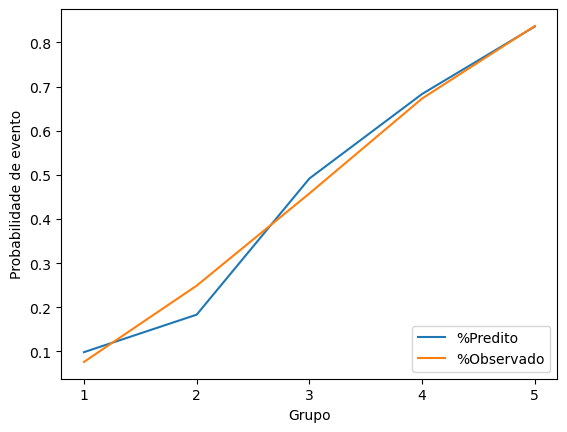

In [43]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

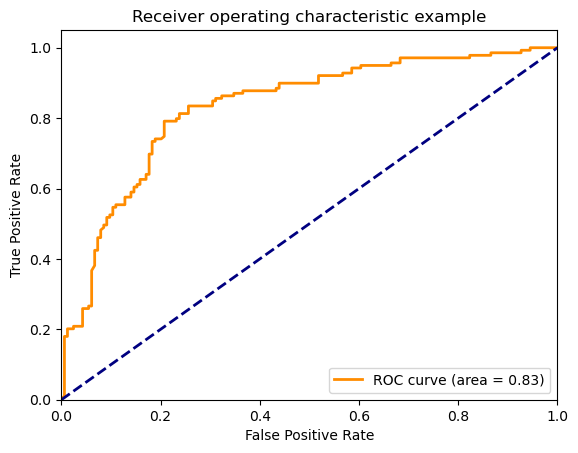

In [44]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

Text(0, 0.5, 'Função Distribuição Acumulada')

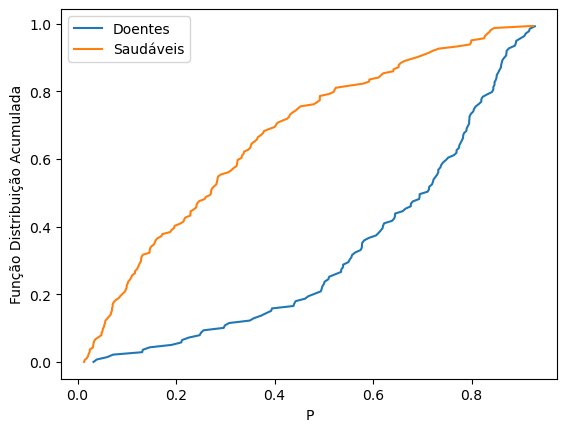

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = df.loc[df['flag_doente']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Doentes')

score_pop2 = df.loc[df['flag_doente']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Saudáveis')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')


In [47]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df['flag_doente'], df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df.loc[df['flag_doente'] == 1, 'predito'], df.loc[df['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 77.89%
KS: 58.40% 
AUC: 83.11% 
GINI: 66.22%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [29]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


In [30]:
reglog = smf.logit("flag_doente ~ sex + cp + age + restecg + slope + exang + thal",data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.415553
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      293
Method:                           MLE   Df Model:                            9
Date:                Fri, 02 Jun 2023   Pseudo R-squ.:                  0.3975
Time:                        21:05:41   Log-Likelihood:                -125.91
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 3.895e-31
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.8102      1.413     -6.234      0.000     -11.580      -6.040
thal[T.6.0]     0.6816      0.642      1.062      0.288      -0.576       1.939
thal[T.7.0]     1.6719      0.356      4.691      0.000       0.973       2.370
thal[T.?]       0.9093      1.870      0.486      0.627      -2.757       4.575
sex             1.1462      0.395      2.900      0.004       0.371       1.921
cp              0.7596      0.177      4.298      0.000       0.413       1.106
age             0.0499      0.019      2.614      0.009       0.012       0.087
restecg         0.3276      0.164      2.003      0.045       0.007       0.648
slope           0.7801      0.269      2.896      0.004       0.252       1.308
exang           1.0986      0.359      3.059      0.002       0.395       1.803
===============================================================================
"""

In [31]:
df2 = df[['sex', 'cp', 'age', 'restecg', 'slope', 'thal', 'exang', 'flag_doente']]
df2

,sex,cp,age,restecg,slope,thal,exang,flag_doente
0,1.0,1.0,63.0,2.0,3.0,6.0,0.0,0
1,1.0,4.0,67.0,2.0,2.0,3.0,1.0,1
2,1.0,4.0,67.0,2.0,2.0,7.0,1.0,1
3,1.0,3.0,37.0,0.0,3.0,3.0,0.0,0
4,0.0,2.0,41.0,2.0,1.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...
298,1.0,1.0,45.0,0.0,2.0,7.0,0.0,1
299,1.0,4.0,68.0,0.0,2.0,7.0,0.0,1
300,1.0,4.0,57.0,0.0,2.0,7.0,1.0,1
301,0.0,2.0,57.0,2.0,2.0,3.0,0.0,1


In [32]:
df2['predito'] = reglog.predict(df2)
df2

C:\Users\lucca\AppData\Local\Temp\ipykernel_28116\156058656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['predito'] = reglog.predict(df2)


,sex,cp,age,restecg,slope,thal,exang,flag_doente,predito
0,1.0,1.0,63.0,2.0,3.0,6.0,0.0,0,0.479800
1,1.0,4.0,67.0,2.0,2.0,3.0,1.0,1,0.884394
2,1.0,4.0,67.0,2.0,2.0,7.0,1.0,1,0.976029
3,1.0,3.0,37.0,0.0,3.0,3.0,0.0,0,0.232016
4,0.0,2.0,41.0,2.0,1.0,3.0,0.0,0,0.021711
...,...,...,...,...,...,...,...,...,...
298,1.0,1.0,45.0,0.0,2.0,7.0,0.0,1,0.193908
299,1.0,4.0,68.0,0.0,2.0,7.0,0.0,1,0.881085
300,1.0,4.0,57.0,0.0,2.0,7.0,1.0,1,0.927708
301,0.0,2.0,57.0,2.0,2.0,3.0,0.0,1,0.097193


In [33]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(df2['flag_doente'], df2['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(df2.loc[df2['flag_doente'] == 1, 'predito'], df2.loc[df2['flag_doente'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 81.85%
KS: 64.66% 
AUC: 89.02% 
GINI: 78.03%


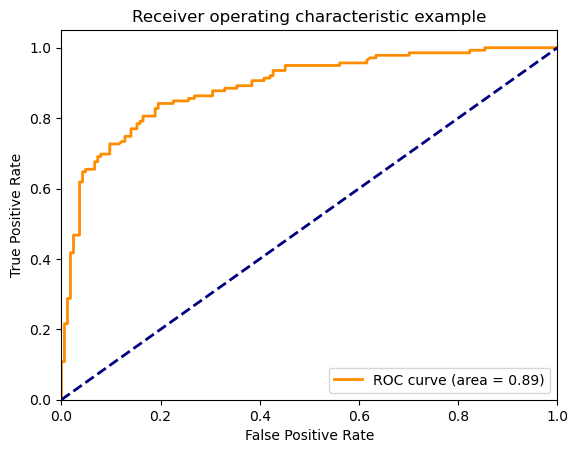

In [34]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(df2['flag_doente'], df2['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()